In [1]:
import os

import numpy as np

import healpy as hp

from scipy.optimize import minimize

import emcee

from KIPAC.nuXgal import Defaults

from KIPAC.nuXgal.EventGenerator import EventGenerator

from KIPAC.nuXgal.Analyze import Analyze

from KIPAC.nuXgal.Likelihood import Likelihood

from KIPAC.nuXgal.file_utils import read_maps_from_fits, write_maps_to_fits

from KIPAC.nuXgal.hp_utils import vector_apply_mask, vector_apply_mask_hp

from KIPAC.nuXgal.plot_utils import FigureDict

from KIPAC.nuXgal.GalaxySample import GalaxySample

from KIPAC.nuXgal  import Utilityfunc

%matplotlib inline  


from scipy import stats

import matplotlib.pyplot as plt


Using /Users/kefang/Softwares/analysis_001 for NUXGAL_DIR


In [2]:
N_yr = 3
galaxyName = 'WISE'
llh = Likelihood(N_yr=N_yr,  galaxyName=galaxyName, computeSTD=False, N_re=100)



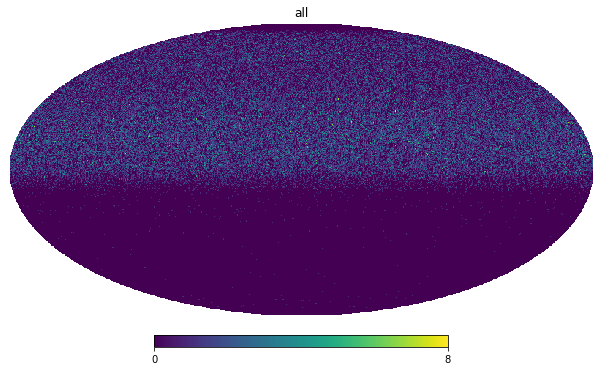

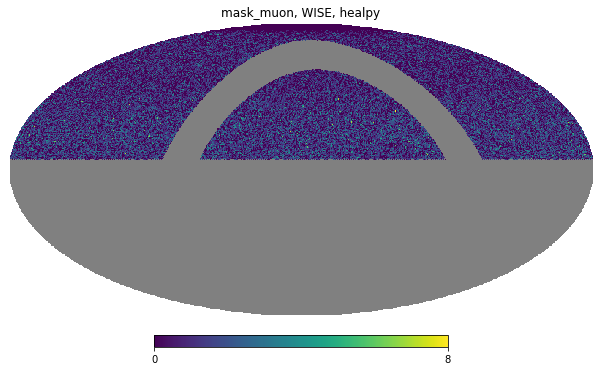

In [36]:
datamap = llh.eg.SyntheticData(N_yr, f_diff=0., density_nu=llh.gs.density)
hp.mollview(datamap[0], title="all")


#datamap = vector_apply_mask(datamap, llh.idx_mask, copy=False)
#hp.mollview(datamap[0], title="mask_muon, WISE")


dm = datamap[0] * 1.0
dm[llh.idx_mask] = hp.UNSEEN
hp.mollview(dm, title="mask_muon, WISE, healpy")



(1e-06, 0.001)

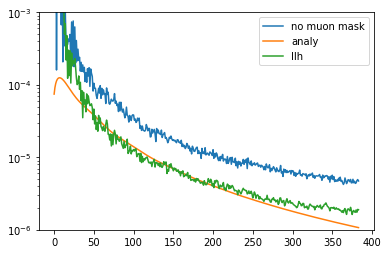

In [5]:
hpMask = hp.pixelfunc.ma(np.ones(Defaults.NPIXEL))
hpMask.mask = llh.gs.mask
plt.plot(np.arange(Defaults.NCL), hp.anafast( llh.gs.overdensity + hpMask),label='no muon mask')

plt.yscale('log')
analyCLpath = os.path.join(Defaults.NUXGAL_ANCIL_DIR, 'Cl_ggRM.dat')
analyCL = np.loadtxt(analyCLpath)
plt.plot(np.arange(Defaults.NCL), analyCL[0:Defaults.NCL], label='analy')
plt.plot(np.arange(Defaults.NCL), llh.w_model_f1[0], label='llh')
#plt.plot(np.arange(Defaults.NCL), llh.w_atm_std[0], label='std')

#plt.plot(np.arange(Defaults.NCL), llh.cf.crossCorrelationFromCountsmap_mask( datamap, llh.gs.overdensity, llh.hpMask )[0], label='mean')

#plt.plot(np.arange(Defaults.NCL), llh.cf.crossCorrelationFromCountsmap( datamap, llh.gs.overdensity )[0], label='mean')



#plt.plot(np.arange(Defaults.NCL), llh.w_atm_mean[1], label='mean')

plt.legend()
plt.ylim(1e-6, 1e-3)

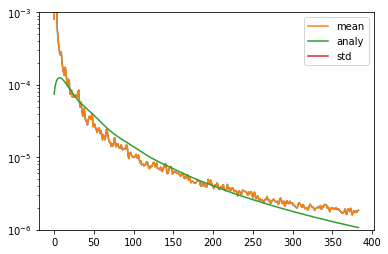

In [41]:
map = llh.gs.overdensity
#map[llh.gs.idx_galaxymask] = hp.UNSEEN

map[llh.idx_mask] = hp.UNSEEN


#hp.mollview(map)
plt.plot(np.arange(Defaults.NCL), hp.anafast(map) )

plt.plot(np.arange(Defaults.NCL), llh.w_model_f1[0], label='mean')
plt.yscale('log')
plt.ylim(1e-6, 1e-3)
analyCLpath = os.path.join(Defaults.NUXGAL_ANCIL_DIR, 'Cl_ggRM.dat')
analyCL = np.loadtxt(analyCLpath)
plt.plot(np.arange(Defaults.NCL), analyCL[0:Defaults.NCL] , label='analy')

plt.plot(np.arange(Defaults.NCL), llh.w_atm_std[0], label='std')


plt.legend()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na